Superstore Sales analysis

Data source= "https://www.kaggle.com/datasets/arunjangir245/super-market-sales?select=supermarket_sales.csv"

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns",None)

In [2]:
df=pd.read_csv('C:/Users/Aishwarya MMPL/Documents/GUVI_PYTHON/Projects/Customer/supermarket_sales.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.shape

(1000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
df.describe( include="all")

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000.00000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,19:48,Ewallet,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,NaN,NaN,307.58738,4.761905,15.379369,6.97270
std,NaN,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,NaN,NaN,234.17651,0.000000,11.708825,1.71858
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,NaN,10.17000,4.761905,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,NaN,NaN,118.49750,4.761905,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,NaN,NaN,NaN,241.76000,4.761905,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,NaN,NaN,NaN,448.90500,4.761905,22.445250,8.50000


In [8]:
Numerical =[i for i in df.columns if df[i].dtypes !="O"]# to find len of numerical values 
len(Numerical)
df[Numerical]

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1


Numerical histogram plot

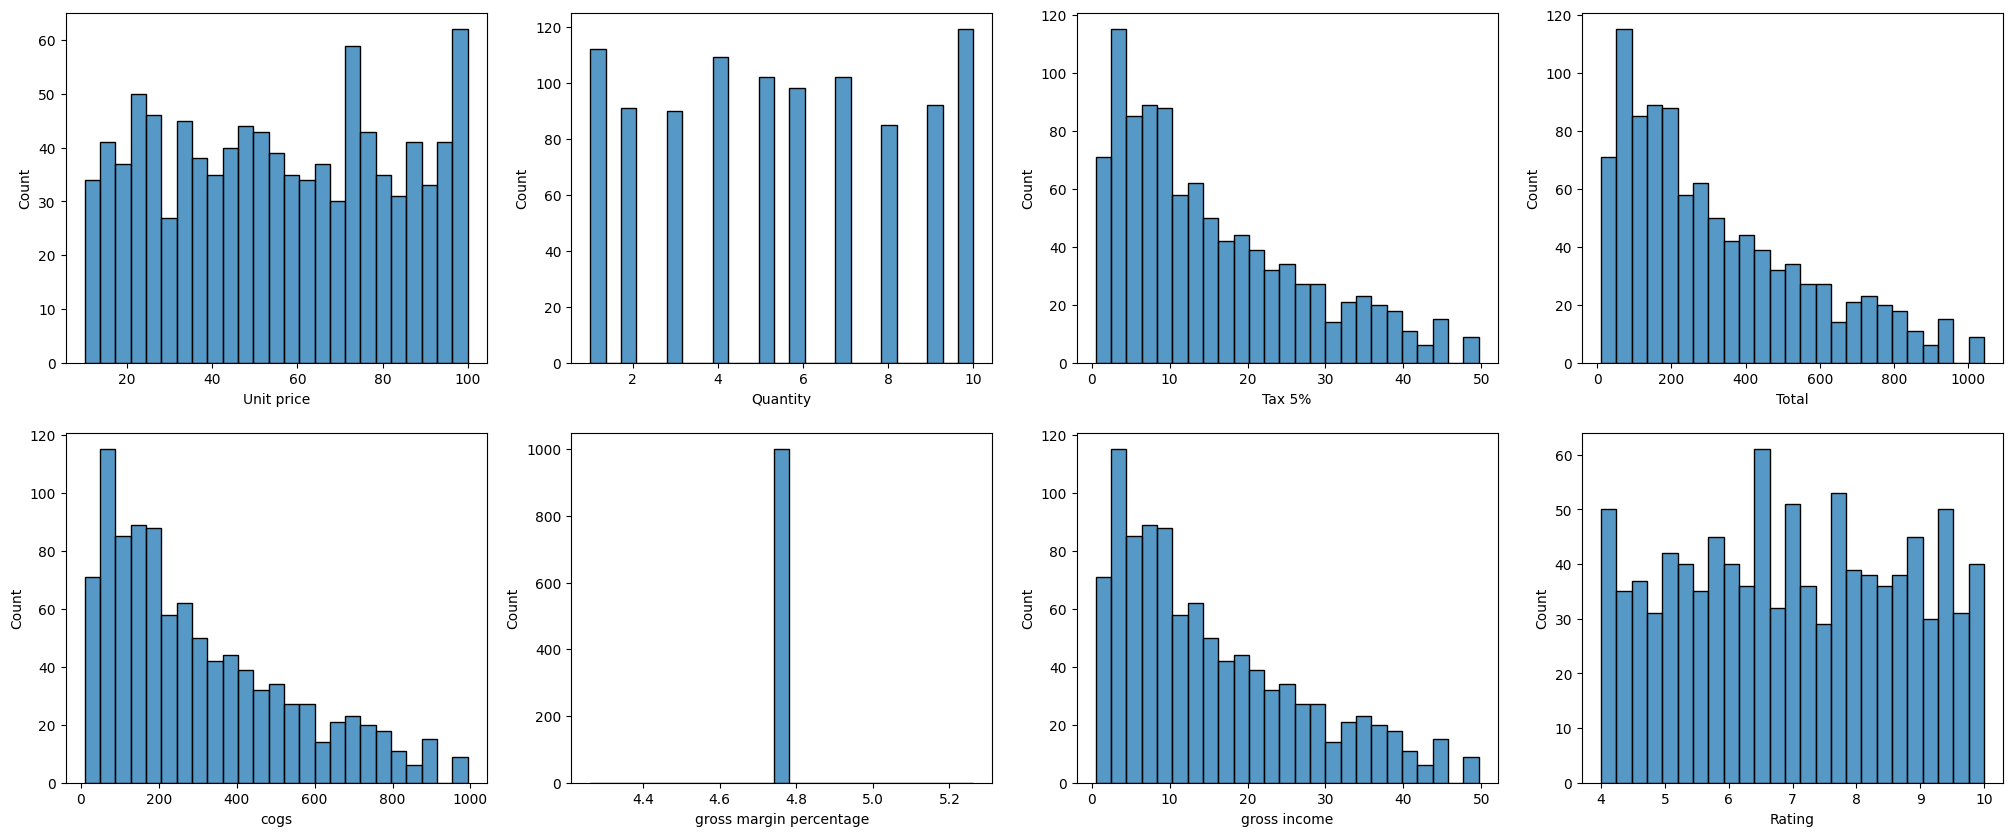

In [9]:
plt.figure(figsize=(25,10))
for i in enumerate(Numerical):
    plt.subplot(2,4,i[0]+1)
    sns.histplot(data=df[i[1]],bins=25)
    

Numerical Box plot

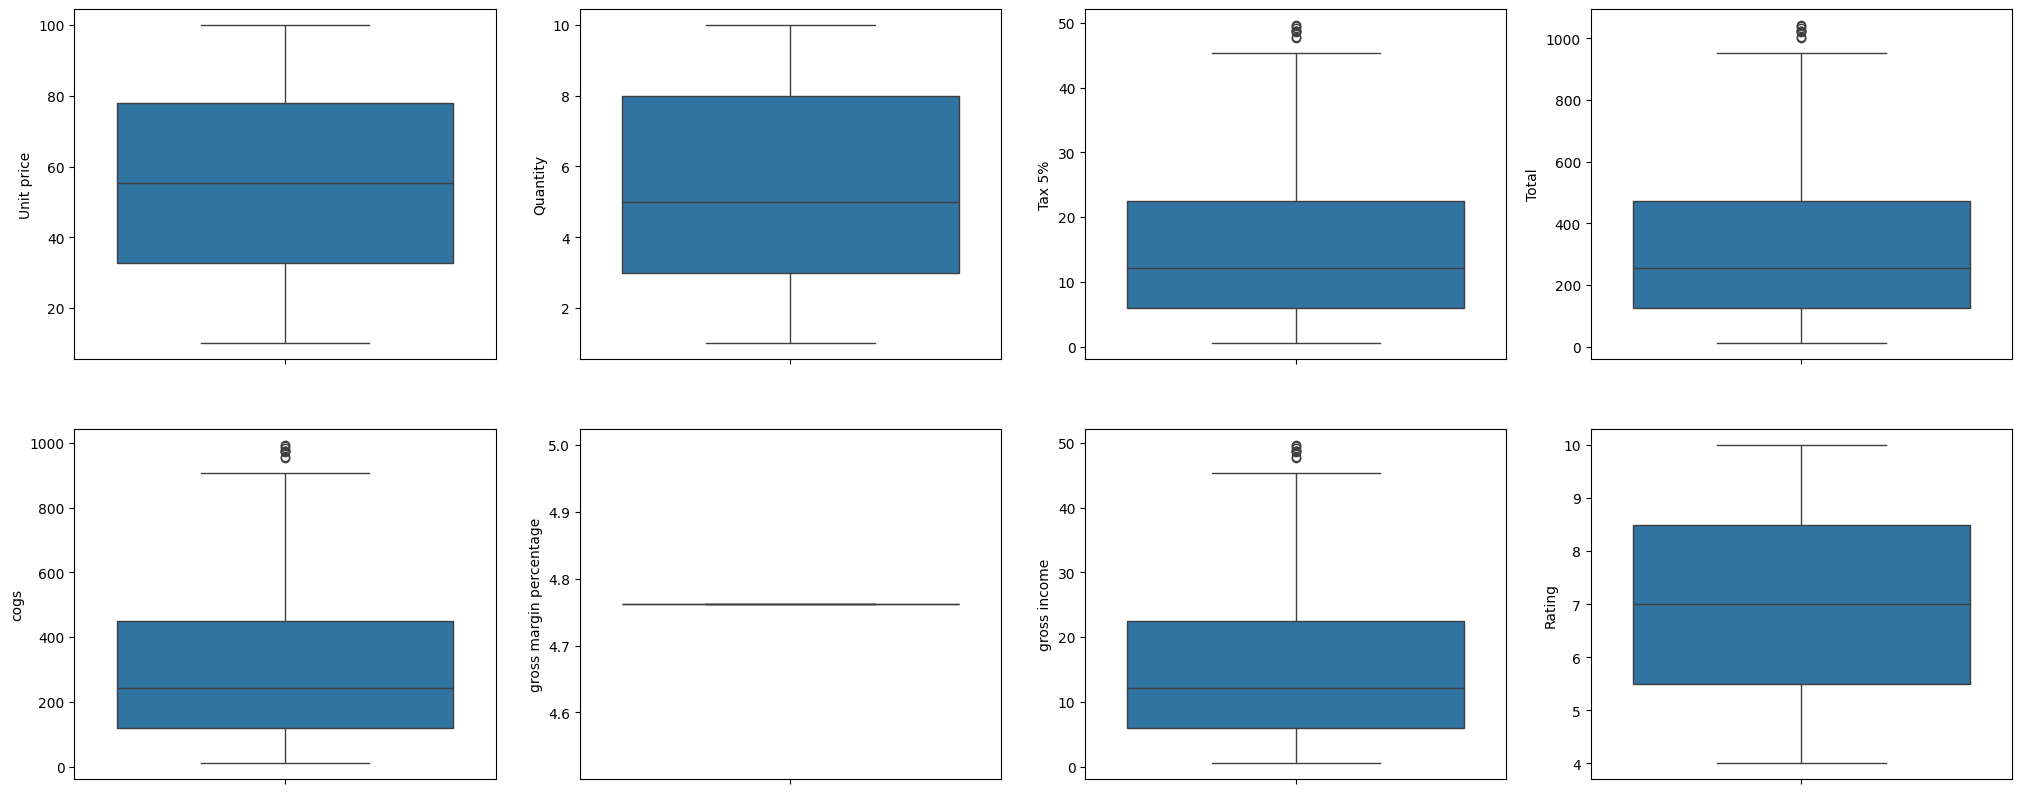

In [10]:
plt.figure(figsize=(25,10))
for i in enumerate(Numerical):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(data=df[i[1]])

KDE Density plot

In [11]:
Numerical1=['Unit price',
 'Quantity',
 'Total',
 'cogs',
 'gross income',
 'Rating']

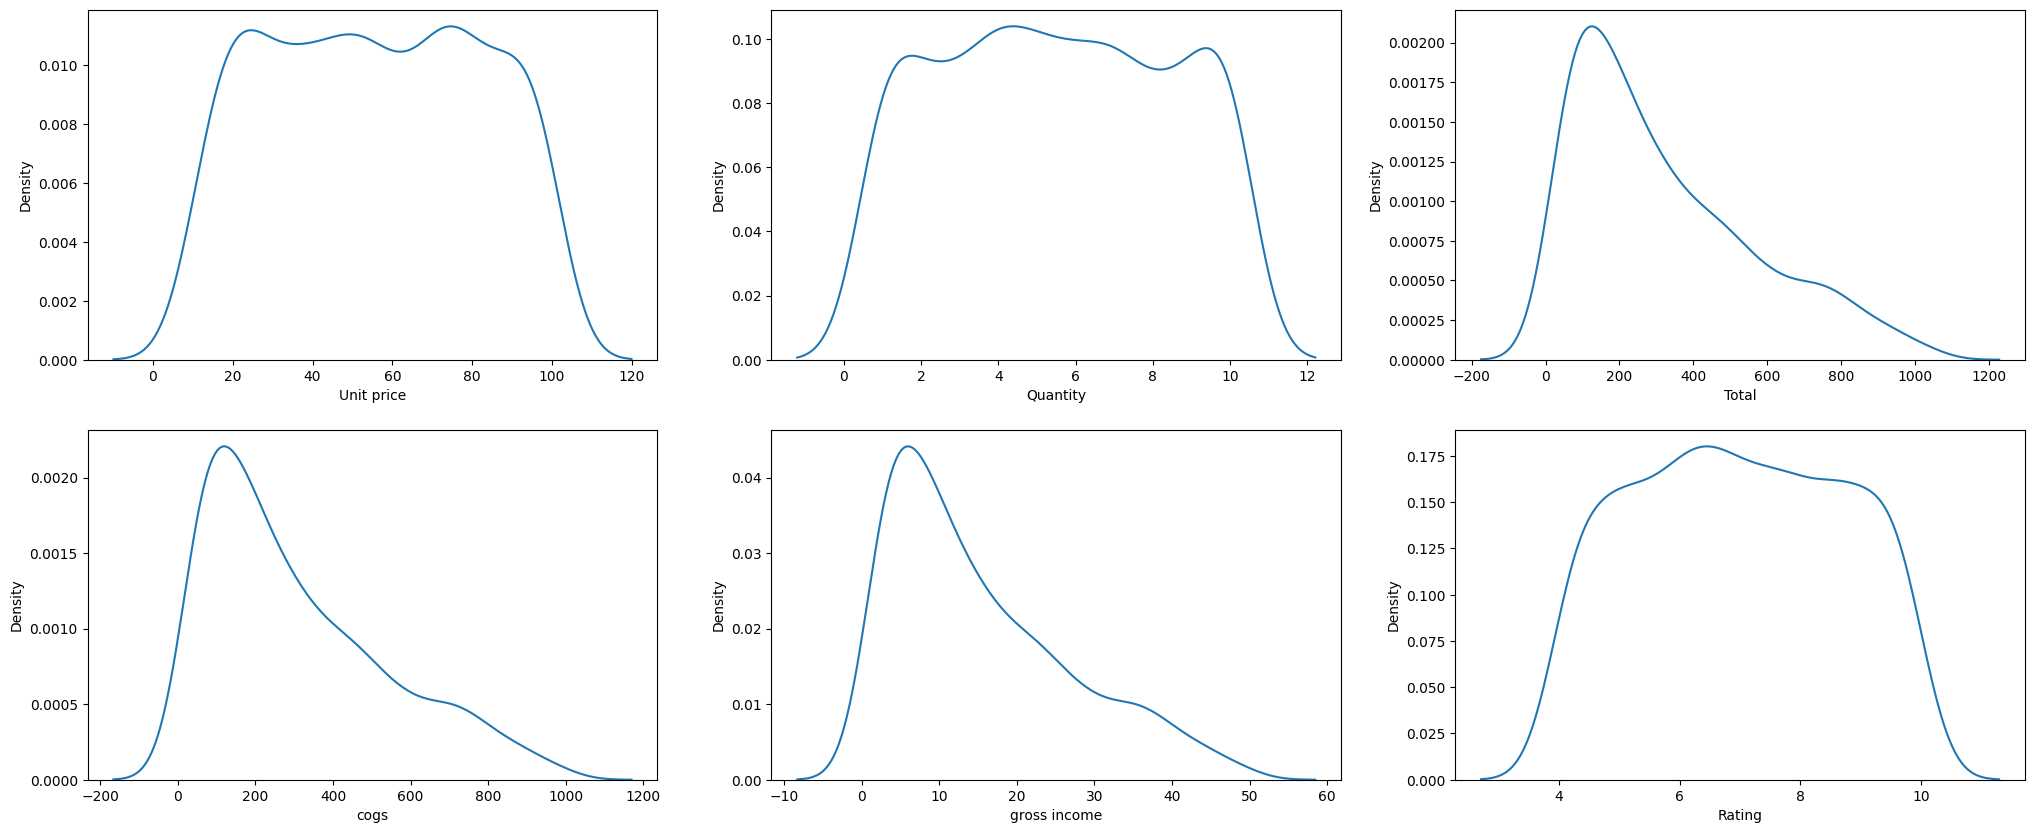

In [12]:
plt.figure(figsize=(25,10))
for i in enumerate(Numerical1):
    plt.subplot(2,3,i[0]+1)
    sns.kdeplot(data=df[i[1]])

Categorial values

In [13]:
cate =[i for i in df.columns if df[i].dtypes =="O"]# to find len of numerical values 
cate
cate_col= ['Branch','City','Customer type','Gender','Product line','Payment']

In [14]:
for i in cate_col:
    print( f"The value count of {df[i].value_counts()} ")
    print()
    print()

The value count of Branch
A    340
B    332
C    328
Name: count, dtype: int64 


The value count of City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64 


The value count of Customer type
Member    501
Normal    499
Name: count, dtype: int64 


The value count of Gender
Female    501
Male      499
Name: count, dtype: int64 


The value count of Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64 


The value count of Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64 




In [15]:
cate_col

['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

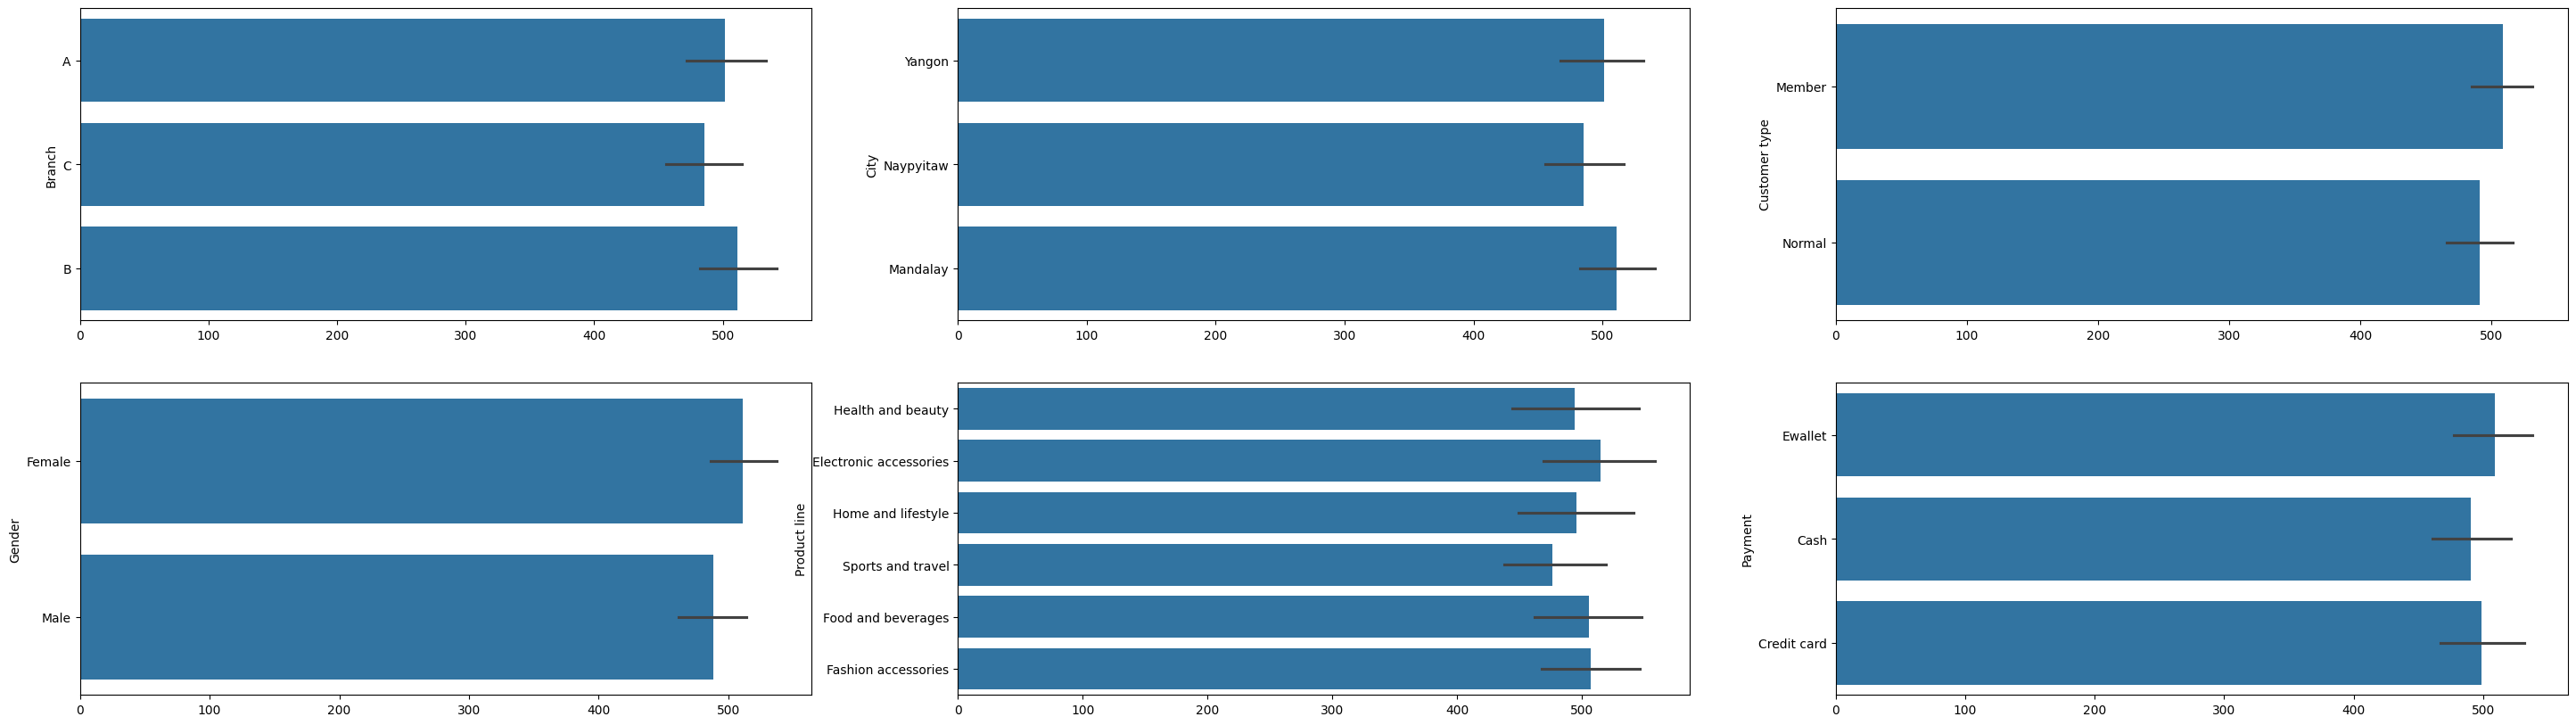

In [16]:
plt.figure(figsize=(36,10))
for i in enumerate(cate_col):
    plt.subplot(2,3,i[0]+1)
    sns.barplot(data=df[i[1]])

Exploratory Data Analysis(EDA)

Analysis Column Product line

In [17]:
df["Product line"]

0           Health and beauty
1      Electronic accessories
2          Home and lifestyle
3           Health and beauty
4           Sports and travel
                ...          
995         Health and beauty
996        Home and lifestyle
997        Food and beverages
998        Home and lifestyle
999       Fashion accessories
Name: Product line, Length: 1000, dtype: object

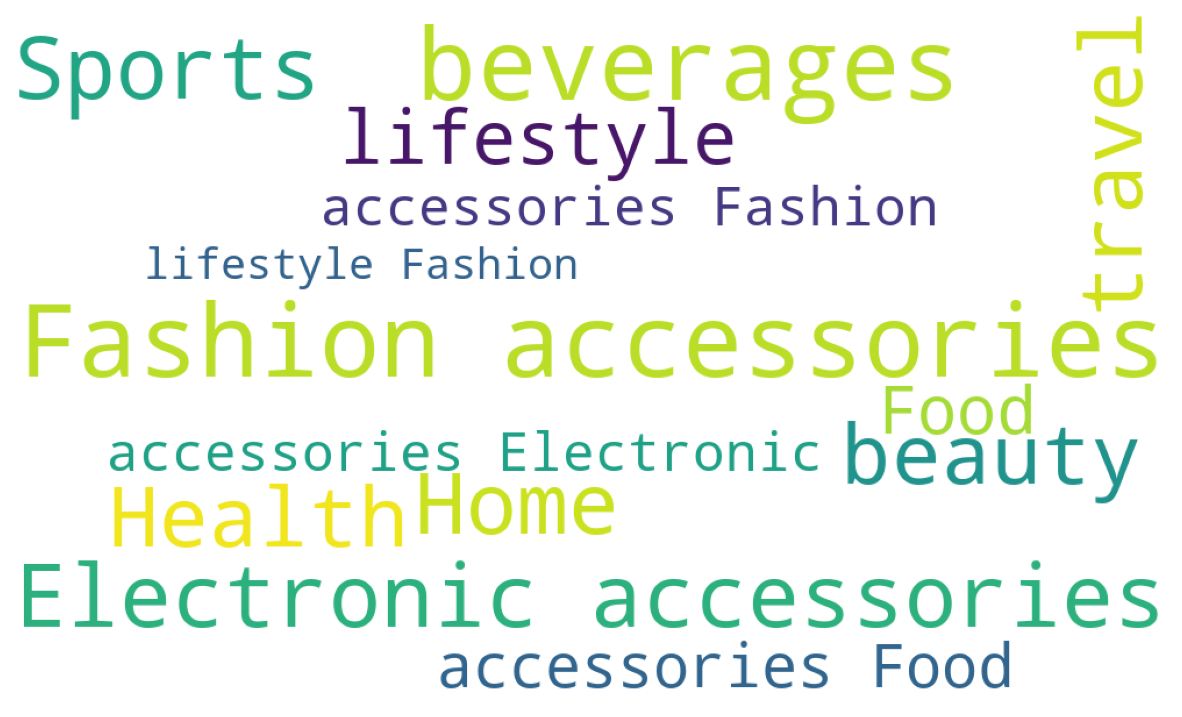

In [18]:
from wordcloud import WordCloud
wordcloud= WordCloud(width=1000, height=600, max_font_size=1000,background_color= "white")
plt.figure(figsize=(15,12))
words= " ".join(df["Product line"])
plt.imshow(wordcloud.generate(words))
plt.axis("off")
plt.show()



In [19]:
df[Numerical]

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1


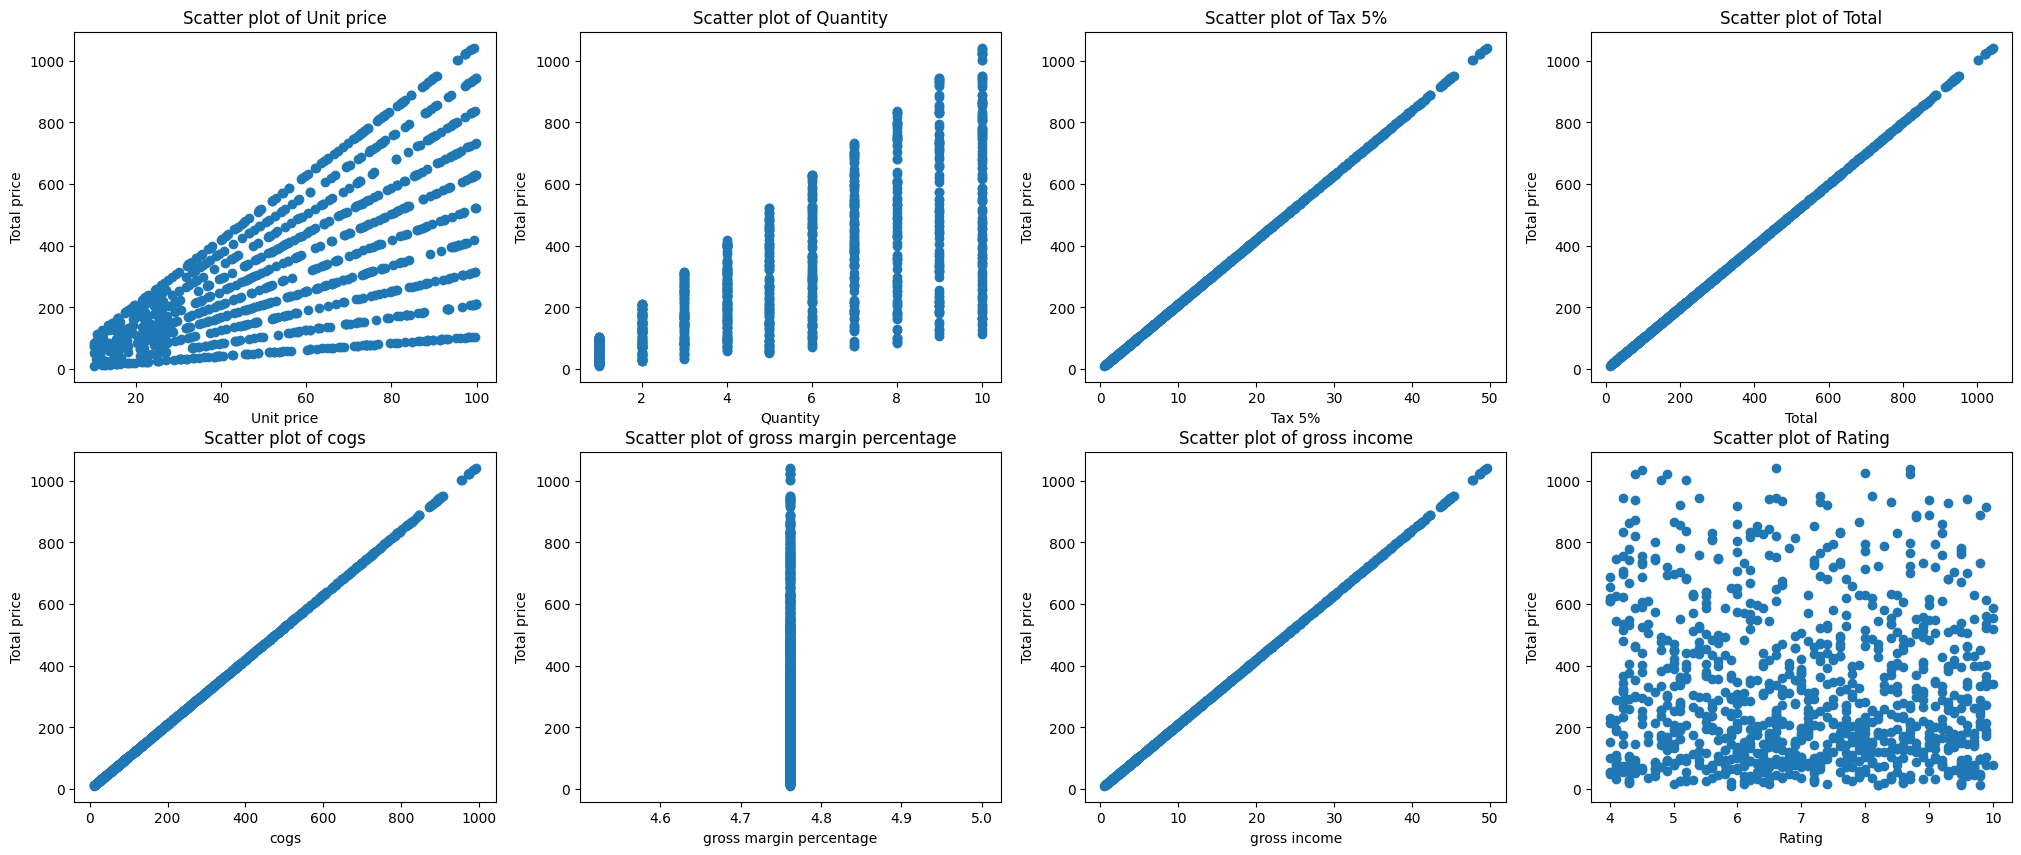

In [20]:
plt.figure(figsize=(25,10))
for i in enumerate(Numerical):
    plt.subplot(2,4,i[0]+1)
    data= df.copy()
    plt.scatter(x=data[i[1]], y=data["Total"])
    plt.xlabel(i[1])
    plt.ylabel("Total price")
    plt.title(f"Scatter plot of {i[1]}")


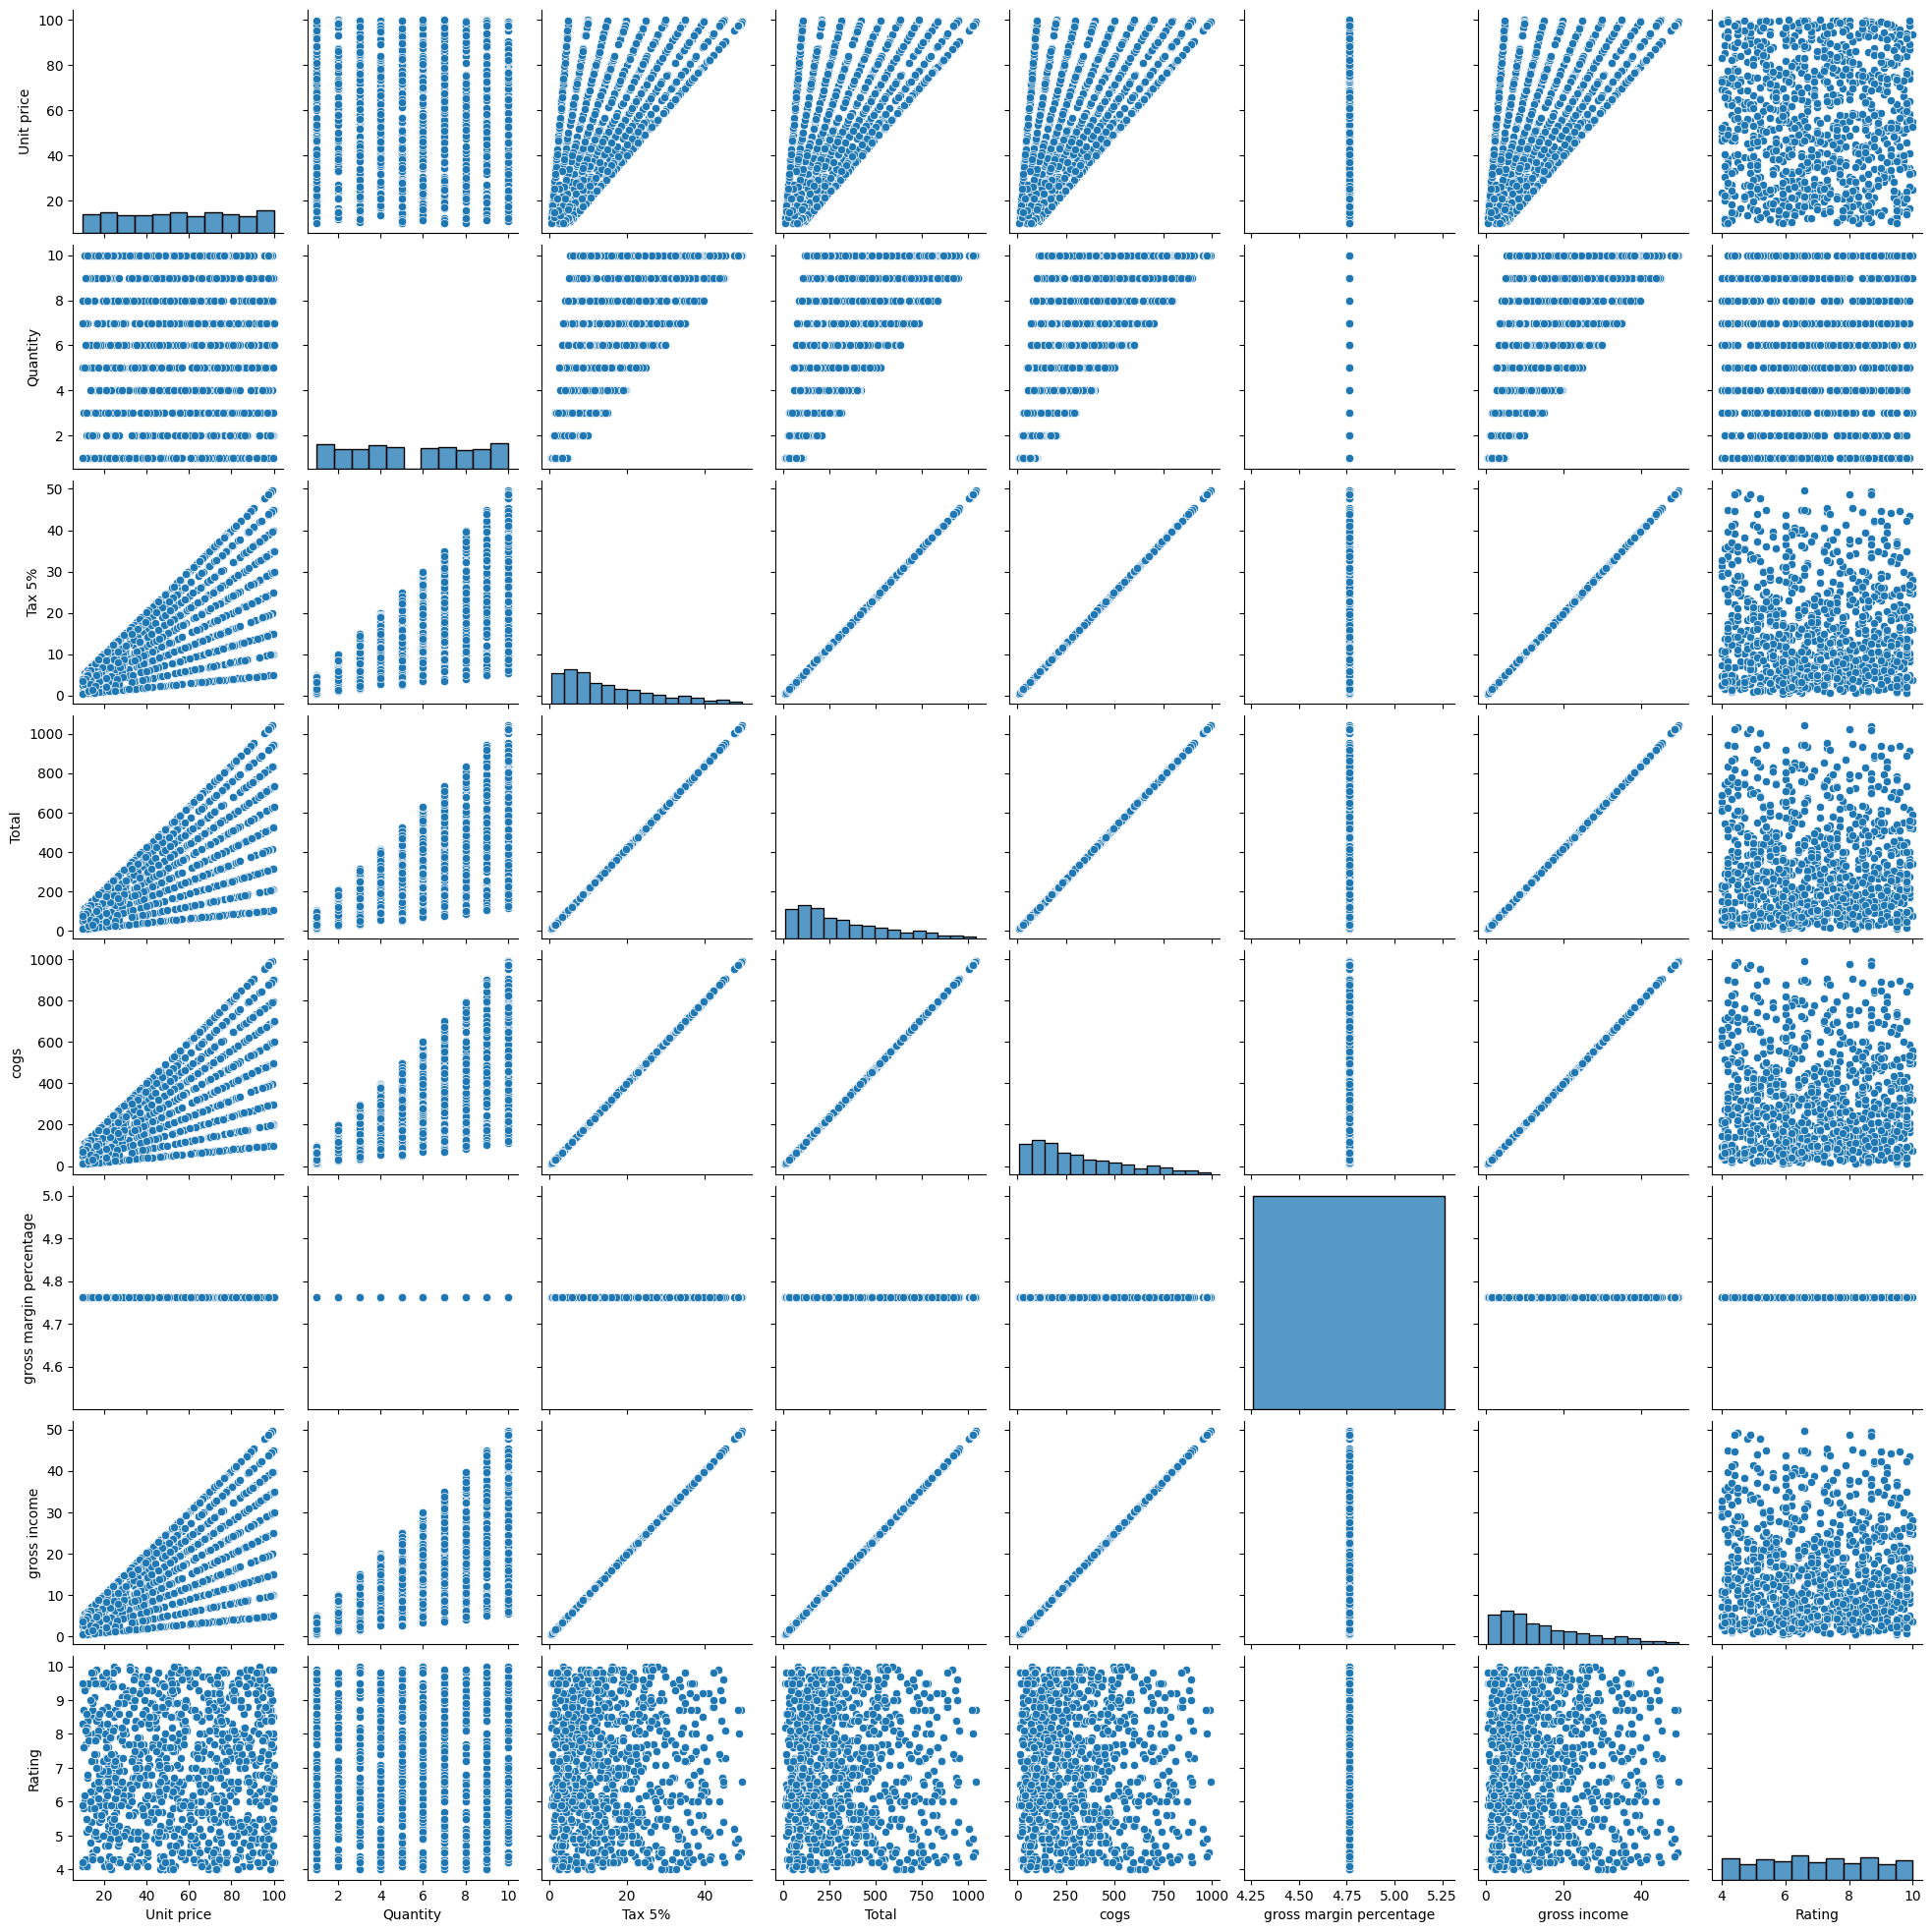

In [21]:
sns.pairplot(data= df,)

Rating column analysis

In [22]:
df1= df.sort_values(by=["Rating"],ascending=False)
df1

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
387,725-56-0833,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.1600,339.3600,2/20/2019,16:49,Credit card,323.20,4.761905,16.1600,10.0
159,423-57-2993,B,Mandalay,Normal,Male,Sports and travel,93.39,6,28.0170,588.3570,3/27/2019,19:18,Ewallet,560.34,4.761905,28.0170,10.0
853,866-70-2814,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,26.3950,554.2950,2/25/2019,11:58,Ewallet,527.90,4.761905,26.3950,10.0
62,347-34-2234,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,2/3/2019,13:40,Ewallet,495.63,4.761905,24.7815,10.0
60,285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,2/15/2019,17:47,Credit card,74.22,4.761905,3.7110,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,182-69-8360,B,Mandalay,Normal,Female,Electronic accessories,23.65,4,4.7300,99.3300,1/30/2019,13:32,Credit card,94.60,4.761905,4.7300,4.0
848,845-94-6841,C,Naypyitaw,Member,Female,Food and beverages,72.88,9,32.7960,688.7160,1/8/2019,19:38,Cash,655.92,4.761905,32.7960,4.0
643,131-15-8856,C,Naypyitaw,Member,Female,Food and beverages,72.52,8,29.0080,609.1680,3/30/2019,19:26,Credit card,580.16,4.761905,29.0080,4.0
328,730-61-8757,B,Mandalay,Member,Male,Health and beauty,51.13,4,10.2260,214.7460,1/25/2019,10:11,Credit card,204.52,4.761905,10.2260,4.0


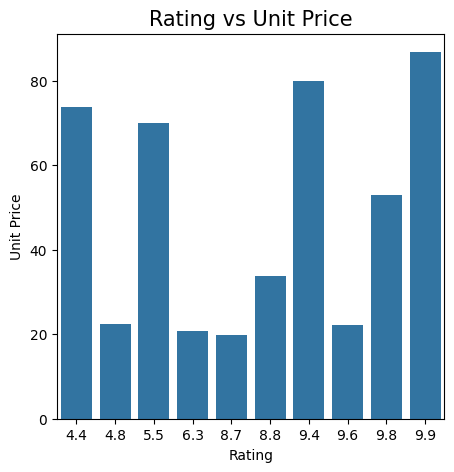

In [23]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Unit price", data=df[170:180])
plt.title("Rating vs Unit Price",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Unit Price")
plt.show()

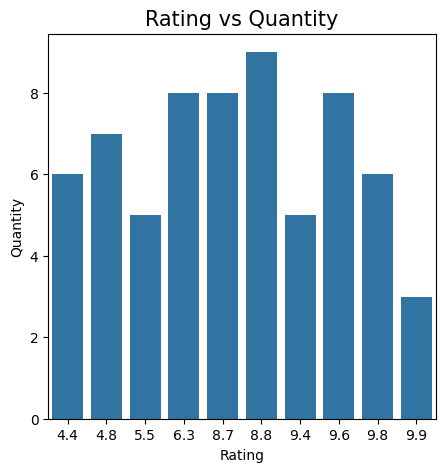

In [24]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Quantity", data=df[170:180])
plt.title("Rating vs Quantity",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.show()

Correlation matrix

In [25]:
Numerical1= ['Unit price','Quantity','Tax 5%','Total','cogs','gross income','Rating']

In [26]:
df[Numerical1].corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000


<Axes: >

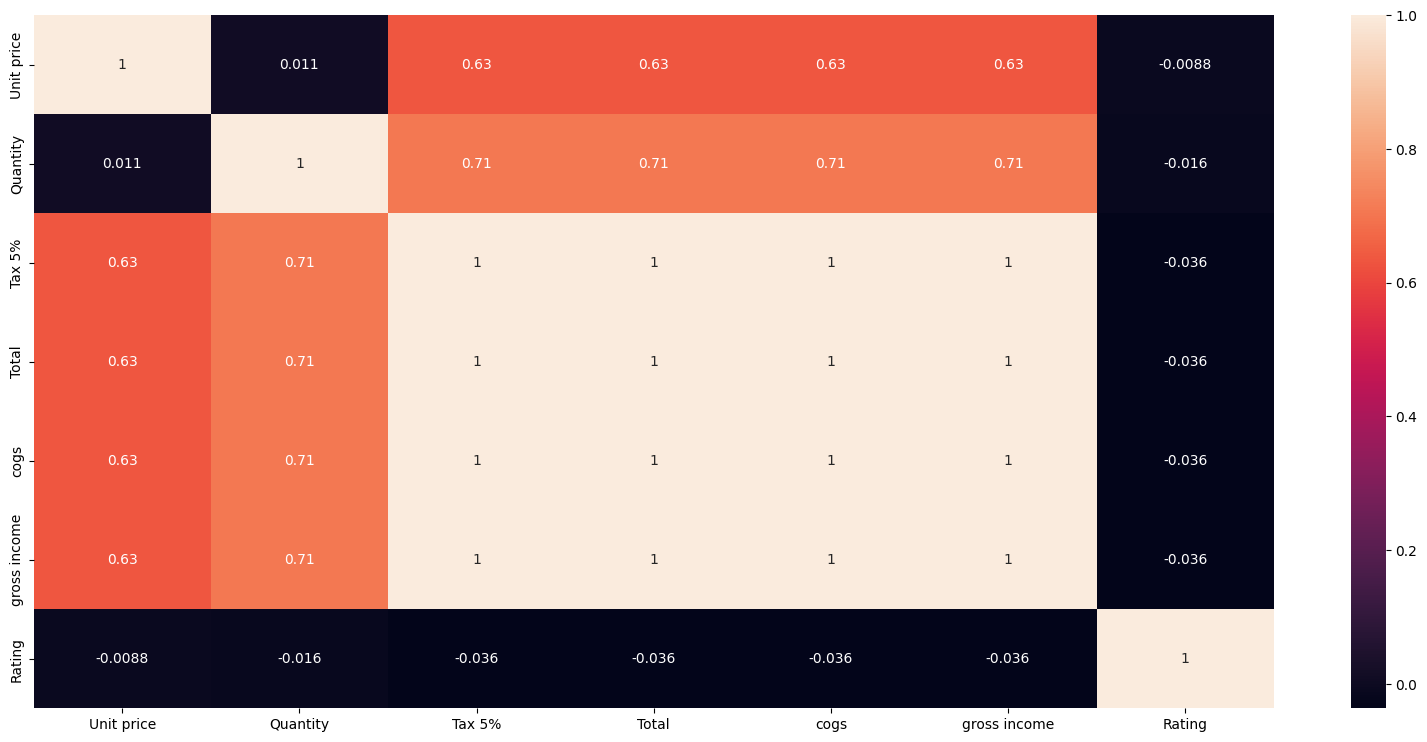

In [27]:
plt.figure(figsize=(20,9))
sns.heatmap(df[Numerical1].corr(),annot=True)

In [42]:
df[:100]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,594-34-4444,A,Yangon,Normal,Male,Electronic accessories,97.16,1,4.8580,102.0180,3/8/2019,20:38,Ewallet,97.16,4.761905,4.8580,7.2
96,766-85-7061,B,Mandalay,Normal,Male,Health and beauty,87.87,10,43.9350,922.6350,3/29/2019,10:25,Ewallet,878.70,4.761905,43.9350,5.1
97,871-39-9221,C,Naypyitaw,Normal,Female,Electronic accessories,12.45,6,3.7350,78.4350,2/9/2019,13:11,Cash,74.70,4.761905,3.7350,4.1
98,865-92-6136,A,Yangon,Normal,Male,Food and beverages,52.75,3,7.9125,166.1625,3/23/2019,10:16,Ewallet,158.25,4.761905,7.9125,9.3


DATASET is used for original data without Numerical change 

In [ ]:
DATASET=df

In [ ]:
df= DATASET

In [ ]:
df["Date"]= pd.to_datetime(df["Date"])

In [ ]:
df["Minute"]=df["Time"].dt.minute
df["Hour"]= df["Time"].dt.hour

In [ ]:
df["Year"]= df["Date"].dt.year
df["Month"]= df["Date"].dt.month
df["day"]= df["Date"].dt.day
df["quater"]= df["Date"].dt.quarter
df["Day_of_week"]= df["Date"].dt.day_of_week

In [ ]:
# Convert timestamps with format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')

In [ ]:
df.drop("Time",axis=1,inplace=True)

In [ ]:
df

Label encoding 

In [ ]:
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()

In [ ]:
df['Branch'] = label.fit_transform(df['Branch'])
df['City'] = label.fit_transform(df['City'])
df['Customer type'] = label.fit_transform(df['Customer type'])
df['Gender'] = label.fit_transform(df['Gender'])
df['Payment'] = label.fit_transform(df['Payment'])
df['Product line'] = label.fit_transform(df['Product line'])

In [ ]:
df.drop("Invoice ID",axis=1,inplace=True)

In [ ]:
df.dtypes

Splitting The Data into Training And Testing Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df1= df
df1

In [ ]:
y=df1['Gender']
x=df1.drop('Gender',axis=1)

In [ ]:
x.dtypes

In [ ]:
# Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

DATA MODELING

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
dtree.fit(x_train,y_train)

In [ ]:
y_pred=dtree.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)

In [ ]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

In [ ]:
y_pred=rfc.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)

In [ ]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

In [ ]:
y_pred=gbc.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(x_train,y_train)*100)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

In [ ]:
y_pred=knn.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)

As we see best Model is given by Random forest classifier(100% Accuracy).